<a href="https://colab.research.google.com/github/arushijha03/reelMetrics/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Gathering 3 most popular movies using TMDb API from 1995 to 2024

In [215]:
import requests
import pandas as pd

api_key = "c6f4c85db55f80e736382e536715808c"

base_url = "https://api.themoviedb.org/3/discover/movie"

years = list(range(1995, 2025))

movies_data = []

for year in years:
    params = {
        "api_key": api_key,
        "primary_release_year": year,
        "sort_by": "popularity.desc",
        "language": "en-US",
        "page": 1
    }

    response = requests.get(base_url, params=params)

    if response.status_code == 200:
        movies = response.json().get("results", [])[:3]
        for rank, movie in enumerate(movies, start=1):
            movies_data.append({
                "Rank": rank,
                "Title": movie.get("title"),
                "Release Year": year,
                "Popularity": movie.get("popularity"),
                "Vote Average": movie.get("vote_average"),
                "Vote Count": movie.get("vote_count")
            })
    else:
        print(f"Failed to fetch data for year {year}: {response.status_code}")

top_3_movies_df = pd.DataFrame(movies_data)
top_3_movies_df.to_csv("top_3_movies_1995_2024.csv", index=False)
print(top_3_movies_df.head())

   Rank                                              Title  Release Year  \
0     1                                          Toy Story          1995   
1     2                                              Se7en          1995   
2     3                                         Braveheart          1995   
3     1                                          Scan Doll          1996   
4     2  Don't Be a Menace to South Central While Drink...          1996   

   Popularity  Vote Average  Vote Count  
0     136.657         7.970       18567  
1     119.542         8.400       21323  
2      85.728         7.900       10234  
3      80.224         7.000           1  
4      57.073         7.025        1339  


#Gathering data from CSV from IMDb database for years 1995 to 2024

In [216]:
import glob

csv_files = glob.glob("merged_movies_data_*.csv")

dfs = []

for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

merged_df = pd.concat(dfs, ignore_index=True)

merged_df.columns = merged_df.columns.str.upper()

merged_df.to_csv("Uncleaned_Movies_Data_1995_2024.csv", index=False)
merged_df.head()

,TITLE,MOVIE LINK,YEAR,DURATION,MPA,RATING,VOTES,BUDGET,GROSSWORLDWIDE,GROSS_US_CANADA,...,STARS,GENRES,COUNTRIES_ORIGIN,FILMING_LOCATIONS,PRODUCTION_COMPANIES,LANGUAGES,WINS,NOMINATIONS,OSCARS,RELEASE_DATE
0,1. Spider-Man,https://www.imdb.com/title/tt0145487/?ref_=sr_t_1,2002,2h 1m,PG-13,7.4,907K,139000000.0,825802095.0,407774549.0,...,"['Tobey Maguire', 'Kirsten Dunst', 'Willem Daf...","['Superhero', 'Urban Adventure', 'Action', 'Ad...",['United States'],"['Queensboro Bridge, Manhattan, New York City,...","['Columbia Pictures', 'Marvel Enterprises', 'L...",['English'],0,65,2,2002.0
1,2. The Lord of the Rings: The Two Towers,https://www.imdb.com/title/tt0167261/?ref_=sr_t_2,2002,2h 59m,PG-13,8.8,1.8M,94000000.0,938242927.0,345518923.0,...,"['Elijah Wood', 'Ian McKellen', 'Viggo Mortens...","['Adventure Epic', 'Dark Fantasy', 'Epic', 'Fa...","['New Zealand', 'United States']","['Hinuera Valley, Matamata, Waikato, New Zeala...","['New Line Cinema', 'WingNut Films', 'The Saul...","['English', 'Sindarin', 'Old English']",0,138,0,2002.0
2,3. Star Wars: Episode II - Attack of the Clones,https://www.imdb.com/title/tt0121765/?ref_=sr_t_3,2002,2h 22m,PG,6.6,778K,115000000.0,653780724.0,310676740.0,...,"['Hayden Christensen', 'Natalie Portman', 'Ewa...","['Action Epic', 'Adventure Epic', 'Fantasy Epi...","['United States', 'United Kingdom']","['Villa del Balbianello, Lenno, Lake Como, Lom...","['Lucasfilm', 'Recce & Production Services', '...",['English'],0,71,1,2002.0
3,4. Harry Potter and the Chamber of Secrets,https://www.imdb.com/title/tt0295297/?ref_=sr_t_4,2002,2h 41m,PG,7.4,716K,100000000.0,882740355.0,262641637.0,...,"['Daniel Radcliffe', 'Rupert Grint', 'Emma Wat...","['Sword & Sorcery', 'Teen Adventure', 'Teen Fa...","['United Kingdom', 'United States']","['Glenfinnan Viaduct, Fort William, Highland, ...","['Warner Bros.', 'Heyday Films', '1492 Pictures']","['English', 'Latin']",0,50,0,2002.0
4,5. My Big Fat Greek Wedding,https://www.imdb.com/title/tt0259446/?ref_=sr_t_5,2002,1h 35m,PG,6.6,147K,5000000.0,368744044.0,241438208.0,...,"['Nia Vardalos', 'John Corbett', 'Michael Cons...","['Feel-Good Romance', 'Romantic Comedy', 'Come...","['Canada', 'United States']","['Ryerson Polytechnic University, Toronto, Ont...","['Alliance Cinema', 'Gold Circle Films', 'Home...","['English', 'Greek']",0,29,1,2002.0


In [217]:
merged_df = pd.read_csv("/content/Uncleaned_Movies_Data_1995_2024(2).csv")

In [218]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15850 entries, 0 to 15849
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TITLE                  15850 non-null  object 
 1   MOVIE LINK             15850 non-null  object 
 2   YEAR                   15850 non-null  int64  
 3   DURATION               15806 non-null  object 
 4   MPA                    13498 non-null  object 
 5   RATING                 15802 non-null  float64
 6   VOTES                  15802 non-null  object 
 7   BUDGET                 7327 non-null   float64
 8   GROSSWORLDWIDE         13931 non-null  float64
 9   GROSS_US_CANADA        13352 non-null  float64
 10  OPENING_WEEKEND_GROSS  12580 non-null  float64
 11  DIRECTORS              15850 non-null  object 
 12  WRITERS                15850 non-null  object 
 13  STARS                  15850 non-null  object 
 14  GENRES                 15850 non-null  object 
 15  CO

In [219]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import math

numeric_cols = ['RATING', 'BUDGET', 'GROSSWORLDWIDE', 'NOMINATIONS']

num_plots = len(numeric_cols)
rows = math.ceil(num_plots / 2)

fig = make_subplots(rows=rows, cols=2, subplot_titles=[f"Boxplot of {col}" for col in numeric_cols])

for i, col in enumerate(numeric_cols):
    row = (i // 2) + 1
    col_pos = (i % 2) + 1
    fig.add_trace(go.Box(y=merged_df[col], name=col, marker_color='royalblue'), row=row, col=col_pos)

fig.update_layout(title_text="Boxplots of Numerical Columns", title_x=0.5, height=rows * 300, showlegend=False)

fig.show()


<ipython-input-220-196f9ea0b2f0>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-220-196f9ea0b2f0>:15: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



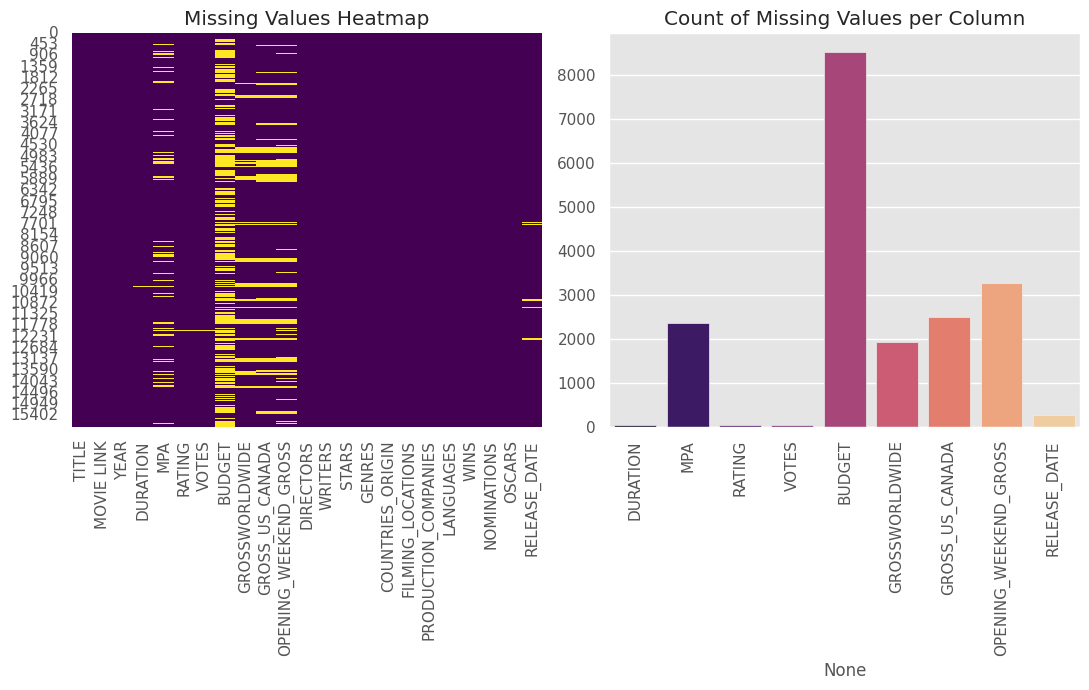

In [220]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

fig, axes = plt.subplots(1, 2, figsize=(11, 7))

sns.heatmap(merged_df.isnull(), cmap='viridis', cbar=False, ax=axes[0])
axes[0].set_title("Missing Values Heatmap")

missing_counts = merged_df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]
sns.barplot(x=missing_counts.index, y=missing_counts.values, ax=axes[1], palette="magma")
axes[1].set_title("Count of Missing Values per Column")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

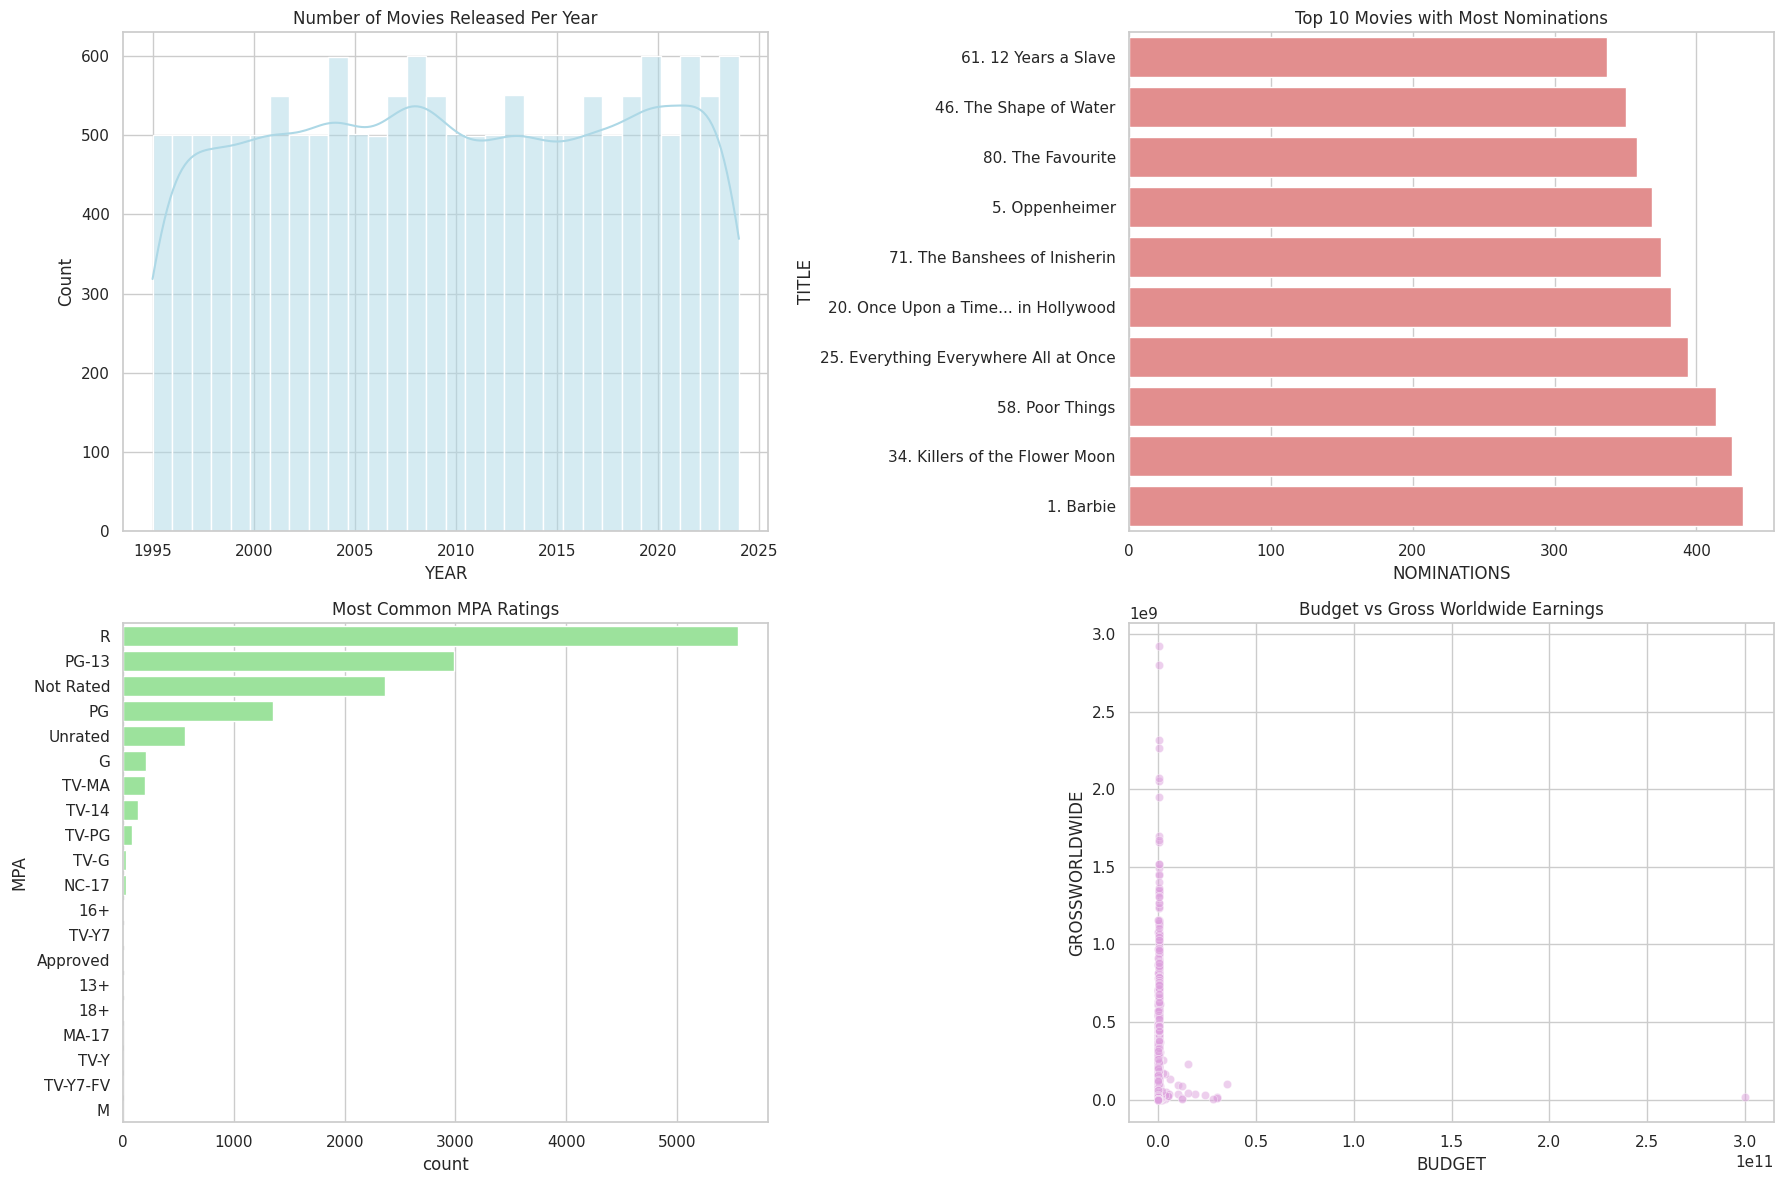

In [221]:
sns.set_theme(style="whitegrid", palette="pastel")

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

sns.histplot(merged_df['YEAR'], bins=30, kde=True, ax=axes[0, 0], color="lightblue")
axes[0, 0].set_title("Number of Movies Released Per Year")

top_wins = merged_df.nlargest(10, 'NOMINATIONS')[['TITLE', 'NOMINATIONS']]
sns.barplot(x=top_wins['NOMINATIONS'], y=top_wins['TITLE'], ax=axes[0, 1], color="lightcoral")
axes[0, 1].set_title("Top 10 Movies with Most Nominations")
axes[0, 1].invert_yaxis()

sns.countplot(y=merged_df['MPA'], order=merged_df['MPA'].value_counts().index, ax=axes[1, 0], color="lightgreen")
axes[1, 0].set_title("Most Common MPA Ratings")

sns.scatterplot(x=merged_df['BUDGET'], y=merged_df['GROSSWORLDWIDE'], alpha=0.5, ax=axes[1, 1], color="plum")
axes[1, 1].set_title("Budget vs Gross Worldwide Earnings")
plt.tight_layout()
plt.show()

Calculating the number of null values

In [222]:
empty_values = merged_df.isnull().sum()

empty_columns = empty_values[empty_values > 0]
empty_values_dict = empty_columns.to_dict()

print("Columns with missing values and their count:")
print(empty_values_dict)

empty_df = pd.DataFrame(empty_columns, columns=["Missing Values"])

Columns with missing values and their count:
{'DURATION': 44, 'MPA': 2352, 'RATING': 48, 'VOTES': 48, 'BUDGET': 8523, 'GROSSWORLDWIDE': 1919, 'GROSS_US_CANADA': 2498, 'OPENING_WEEKEND_GROSS': 3270, 'RELEASE_DATE': 280}


###DATA CLEANING AND PREPARATION

In [223]:
#Removing number from title
import re
def clean_title(title):
    return re.sub(r'^\d+\.\s*', '', str(title))

merged_df["TITLE"] = merged_df["TITLE"].apply(clean_title)

In [224]:
#Drop unrelated columns
merged_df.drop(['MOVIE LINK','GROSS_US_CANADA', 'OPENING_WEEKEND_GROSS','RELEASE_DATE','WINS'], axis=1, inplace=True)

In [225]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15850 entries, 0 to 15849
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TITLE                 15850 non-null  object 
 1   YEAR                  15850 non-null  int64  
 2   DURATION              15806 non-null  object 
 3   MPA                   13498 non-null  object 
 4   RATING                15802 non-null  float64
 5   VOTES                 15802 non-null  object 
 6   BUDGET                7327 non-null   float64
 7   GROSSWORLDWIDE        13931 non-null  float64
 8   DIRECTORS             15850 non-null  object 
 9   WRITERS               15850 non-null  object 
 10  STARS                 15850 non-null  object 
 11  GENRES                15850 non-null  object 
 12  COUNTRIES_ORIGIN      15850 non-null  object 
 13  FILMING_LOCATIONS     15850 non-null  object 
 14  PRODUCTION_COMPANIES  15850 non-null  object 
 15  LANGUAGES          

###Handling Missing Values from TMDb API

In [226]:
import pandas as pd

columns_to_check = ['DURATION', 'RATING', 'VOTES']

movies_with_missing_values = merged_df[merged_df[columns_to_check].isnull().any(axis=1)]["TITLE"].unique()

missing_movies_df = pd.DataFrame(movies_with_missing_values, columns=["Movie Title"])

In [227]:
api_key = "c6f4c85db55f80e736382e536715808c"

# Function to search for a movie by title
def search_movie(title):
    search_url = f"https://api.themoviedb.org/3/search/movie?api_key={api_key}&query={title}"
    response = requests.get(search_url)
    if response.status_code == 200:
        results = response.json().get('results')
        if results:
            return results[0]['id']  # Return the first matching movie's ID
    return None

# Function to get movie details by movie_id
def get_movie_details(movie_id):
    details_url = f"https://api.themoviedb.org/3/movie/{movie_id}?api_key={api_key}"
    response = requests.get(details_url)
    if response.status_code == 200:
        return response.json()
    return None

# Function to fetch missing details for a given movie title
def fetch_missing_movie_info(title):
    movie_id = search_movie(title)
    if movie_id:
        details = get_movie_details(movie_id)
        if details:
            return {
                "DURATION": details.get("runtime"),
                "RATING": details.get("vote_average"),
                "VOTES": details.get("vote_count"),
                "BUDGET": details.get("budget"),
                "GROSSWORLDWIDE": details.get("revenue")
            }
    return None

for title in missing_movies_df["Movie Title"]:
    new_data = fetch_missing_movie_info(title)
    if new_data:
        for col, value in new_data.items():
            merged_df.loc[(merged_df["TITLE"] == title) & (merged_df[col].isna()), col] = value

In [228]:
columns_to_check = ['GROSSWORLDWIDE']

movies_with_missing_values = merged_df[merged_df[columns_to_check].isnull().any(axis=1)]["TITLE"].unique()

missing_movies_df = pd.DataFrame(movies_with_missing_values, columns=["Movie Title"])

In [229]:
api_key = "c6f4c85db55f80e736382e536715808c"

# Function to search for a movie by title
def search_movie(title):
    search_url = f"https://api.themoviedb.org/3/search/movie?api_key={api_key}&query={title}"
    response = requests.get(search_url)
    if response.status_code == 200:
        results = response.json().get('results')
        if results:
            return results[0]['id']  # Return the first matching movie's ID
    return None

# Function to get movie details by movie_id
def get_movie_details(movie_id):
    details_url = f"https://api.themoviedb.org/3/movie/{movie_id}?api_key={api_key}"
    response = requests.get(details_url)
    if response.status_code == 200:
        return response.json()
    return None

# Function to fetch missing details for a given movie title
def fetch_missing_movie_info(title):
    movie_id = search_movie(title)
    if movie_id:
        details = get_movie_details(movie_id)
        if details:
            return {
                "BUDGET": details.get("budget"),
                "GROSSWORLDWIDE": details.get("revenue")
            }
    return None

for title in missing_movies_df["Movie Title"]:
    new_data = fetch_missing_movie_info(title)
    if new_data:
        for col, value in new_data.items():
            merged_df.loc[(merged_df["TITLE"] == title) & (merged_df[col].isna()), col] = value

In [230]:
merged_df.to_csv("Interim_Movies_Data_1995_2024.csv", index=False)


In [231]:
merged_df = pd.read_csv("/content/Interim_Movies_Data_1995_2024.csv")

In [232]:
import numpy as np
def convert_votes(vote):
    if pd.isna(vote):
        return np.nan
    vote = str(vote).replace(',', '').strip()
    vote = vote.upper().replace(',', '').strip()
    if vote.endswith('K'):
        return float(vote[:-1]) * 1_000
    elif vote.endswith('M'):
        return float(vote[:-1]) * 1_000_000
    else:
        return float(vote)

merged_df['VOTES'] = merged_df['VOTES'].apply(convert_votes)

In [233]:
import pandas as pd
import re

# Function to convert "2h 5m" format to total minutes
def convert_duration(duration):
    if pd.isna(duration):  # Handle missing values
        return None

    duration = str(duration).strip().lower()  # Convert to string and clean
    hours = 0
    minutes = 0

    # Extract hours and minutes using regex
    hour_match = re.search(r'(\d+)h', duration)
    minute_match = re.search(r'(\d+)m', duration)

    if hour_match:
        hours = int(hour_match.group(1)) * 60  # Convert hours to minutes
    if minute_match:
        minutes = int(minute_match.group(1))  # Keep minutes as is

    return hours + minutes  # Total duration in minutes

merged_df['DURATION'] = merged_df['DURATION'].apply(convert_duration)

In [234]:
merged_df['MPA'] = merged_df['MPA'].fillna('Not Rated')
merged_df['MPA'] = merged_df['MPA'].replace("Unrated", "Not Rated")
merged_df['GROSSWORLDWIDE'] = merged_df['GROSSWORLDWIDE'].fillna(-1)
merged_df['BUDGET'] = merged_df['BUDGET'].fillna(-1)
merged_df['DURATION'] = merged_df['DURATION'].fillna(-1)
merged_df['RATING'] = merged_df['RATING'].fillna(-1)
merged_df['VOTES'] = merged_df['VOTES'].fillna(-1)

In [235]:
import ast
import pandas as pd

def convert_sort_and_clean_list(value_string):
    if pd.isna(value_string):
        return []
    if isinstance(value_string, list):
        return [str(item).strip("'").strip('"') for item in sorted(value_string)]
    try:
        return [str(item).strip("'").strip('"') for item in sorted(ast.literal_eval(value_string))]
    except (SyntaxError, ValueError):
        return []

columns_to_sort = ['STARS', 'DIRECTORS', 'GENRES', 'COUNTRIES_ORIGIN', 'FILMING_LOCATIONS', 'PRODUCTION_COMPANIES', 'LANGUAGES','WRITERS']
for col in columns_to_sort:
    merged_df[col] = merged_df[col].apply(convert_sort_and_clean_list)

In [236]:
merged_df.head()

,TITLE,YEAR,DURATION,MPA,RATING,VOTES,BUDGET,GROSSWORLDWIDE,DIRECTORS,WRITERS,STARS,GENRES,COUNTRIES_ORIGIN,FILMING_LOCATIONS,PRODUCTION_COMPANIES,LANGUAGES,NOMINATIONS,OSCARS
0,Spider-Man,2002,121.0,PG-13,7.4,907000.0,139000000.0,825802095.0,[Sam Raimi],"[David Koepp, Stan Lee, Steve Ditko]","[Kirsten Dunst, Tobey Maguire, Willem Dafoe]","[Action, Adventure, Sci-Fi, Superhero, Urban A...",[United States],"[Queensboro Bridge, Manhattan, New York City, ...","[Columbia Pictures, Laura Ziskin Productions, ...",[English],65,2
1,The Lord of the Rings: The Two Towers,2002,179.0,PG-13,8.8,1800000.0,94000000.0,938242927.0,[Peter Jackson],"[Fran Walsh, J.R.R. Tolkien, Philippa Boyens]","[Elijah Wood, Ian McKellen, Viggo Mortensen]","[Adventure, Adventure Epic, Dark Fantasy, Dram...","[New Zealand, United States]","[Hinuera Valley, Matamata, Waikato, New Zealand]","[New Line Cinema, The Saul Zaentz Company, Win...","[English, Old English, Sindarin]",138,0
2,Star Wars: Episode II - Attack of the Clones,2002,142.0,PG,6.6,778000.0,115000000.0,653780724.0,[George Lucas],"[George Lucas, Jonathan Hales]","[Ewan McGregor, Hayden Christensen, Natalie Po...","[Action, Action Epic, Adventure, Adventure Epi...","[United Kingdom, United States]","[Villa del Balbianello, Lenno, Lake Como, Lomb...","[Lucasfilm, Mestiere Cinema, Recce & Productio...",[English],71,1
3,Harry Potter and the Chamber of Secrets,2002,161.0,PG,7.4,716000.0,100000000.0,882740355.0,[Chris Columbus],"[J.K. Rowling, Steve Kloves]","[Daniel Radcliffe, Emma Watson, Rupert Grint]","[Adventure, Family, Fantasy, Mystery, Sword & ...","[United Kingdom, United States]","[Glenfinnan Viaduct, Fort William, Highland, S...","[1492 Pictures, Heyday Films, Warner Bros.]","[English, Latin]",50,0
4,My Big Fat Greek Wedding,2002,95.0,PG,6.6,147000.0,5000000.0,368744044.0,[Joel Zwick],[Nia Vardalos],"[John Corbett, Michael Constantine, Nia Vardalos]","[Comedy, Drama, Feel-Good Romance, Romance, Ro...","[Canada, United States]","[Ryerson Polytechnic University, Toronto, Onta...","[Alliance Cinema, Gold Circle Films, Home Box ...","[English, Greek]",29,1


In [237]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15850 entries, 0 to 15849
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TITLE                 15850 non-null  object 
 1   YEAR                  15850 non-null  int64  
 2   DURATION              15850 non-null  float64
 3   MPA                   15850 non-null  object 
 4   RATING                15850 non-null  float64
 5   VOTES                 15850 non-null  float64
 6   BUDGET                15850 non-null  float64
 7   GROSSWORLDWIDE        15850 non-null  float64
 8   DIRECTORS             15850 non-null  object 
 9   WRITERS               15850 non-null  object 
 10  STARS                 15850 non-null  object 
 11  GENRES                15850 non-null  object 
 12  COUNTRIES_ORIGIN      15850 non-null  object 
 13  FILMING_LOCATIONS     15850 non-null  object 
 14  PRODUCTION_COMPANIES  15850 non-null  object 
 15  LANGUAGES          

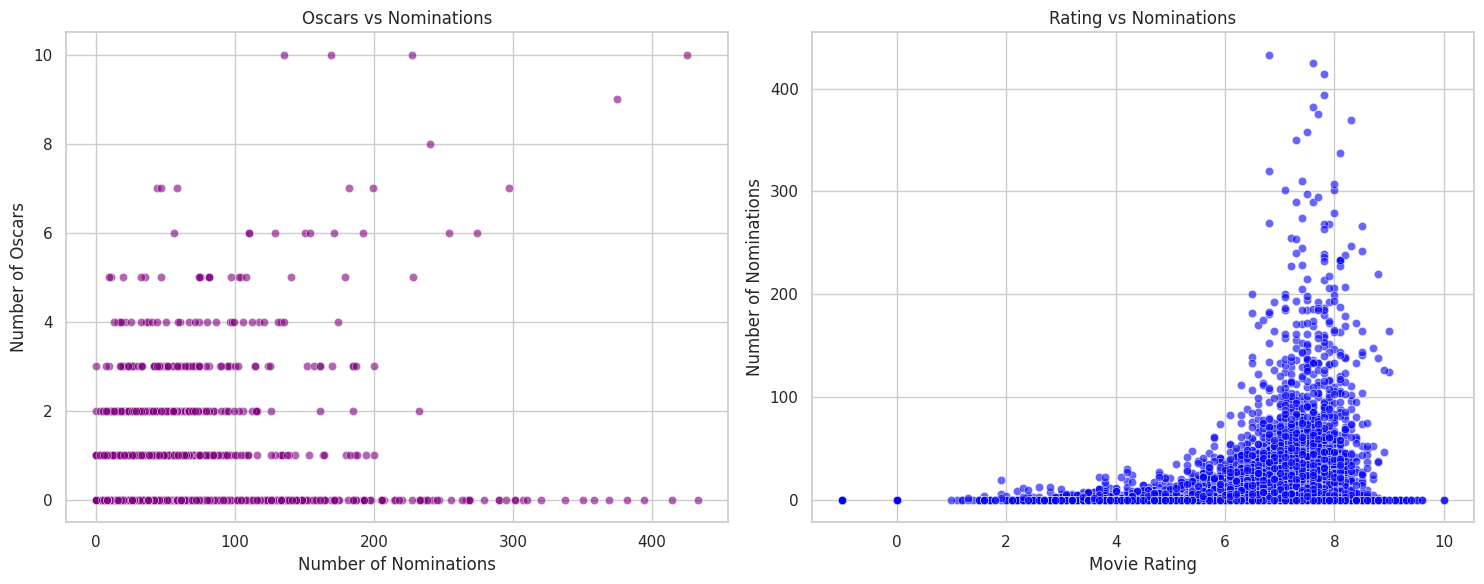

In [238]:
sns.set_theme(style="whitegrid", palette="pastel")

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.scatterplot(x=merged_df['NOMINATIONS'], y=merged_df['OSCARS'], ax=axes[0], color="purple", alpha=0.6)
axes[0].set_title("Oscars vs Nominations")
axes[0].set_xlabel("Number of Nominations")
axes[0].set_ylabel("Number of Oscars")

sns.scatterplot(x=merged_df['RATING'], y=merged_df['NOMINATIONS'], ax=axes[1], color="blue", alpha=0.6)
axes[1].set_title("Rating vs Nominations")
axes[1].set_xlabel("Movie Rating")
axes[1].set_ylabel("Number of Nominations")


plt.tight_layout()
plt.show()

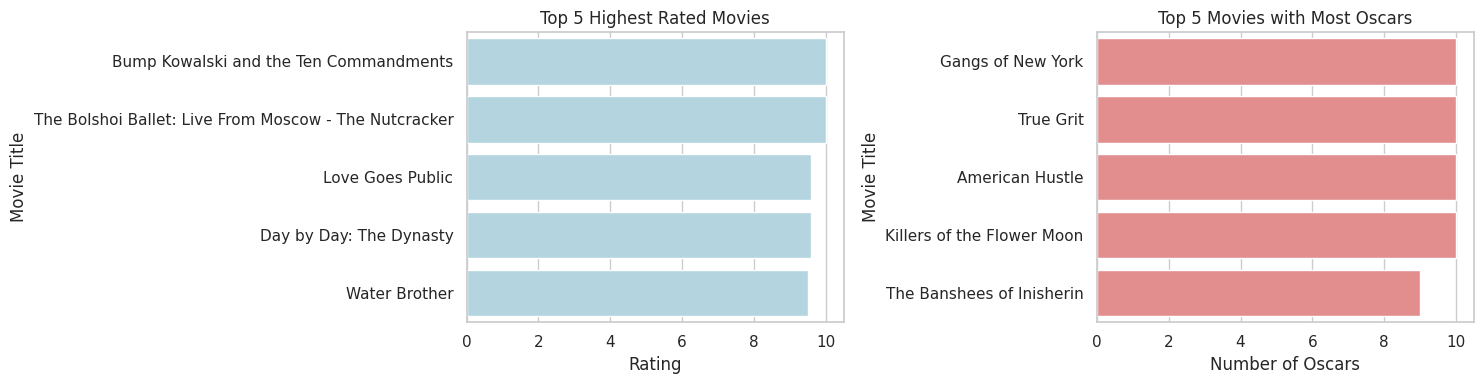

In [239]:
sns.set_theme(style="whitegrid", palette="pastel")

top_rated = merged_df.nlargest(5, 'RATING')[['TITLE', 'RATING']]

top_oscars = merged_df.nlargest(5, 'OSCARS')[['TITLE', 'OSCARS']]

fig, ax = plt.subplots(1, 2, figsize=(15, 4))

sns.barplot(x=top_rated['RATING'], y=top_rated['TITLE'], ax=ax[0], color="lightblue")
ax[0].set_title("Top 5 Highest Rated Movies")
ax[0].set_xlabel("Rating")
ax[0].set_ylabel("Movie Title")

sns.barplot(x=top_oscars['OSCARS'], y=top_oscars['TITLE'], ax=ax[1], color="lightcoral")
ax[1].set_title("Top 5 Movies with Most Oscars")
ax[1].set_xlabel("Number of Oscars")
ax[1].set_ylabel("Movie Title")

plt.tight_layout()
plt.show()

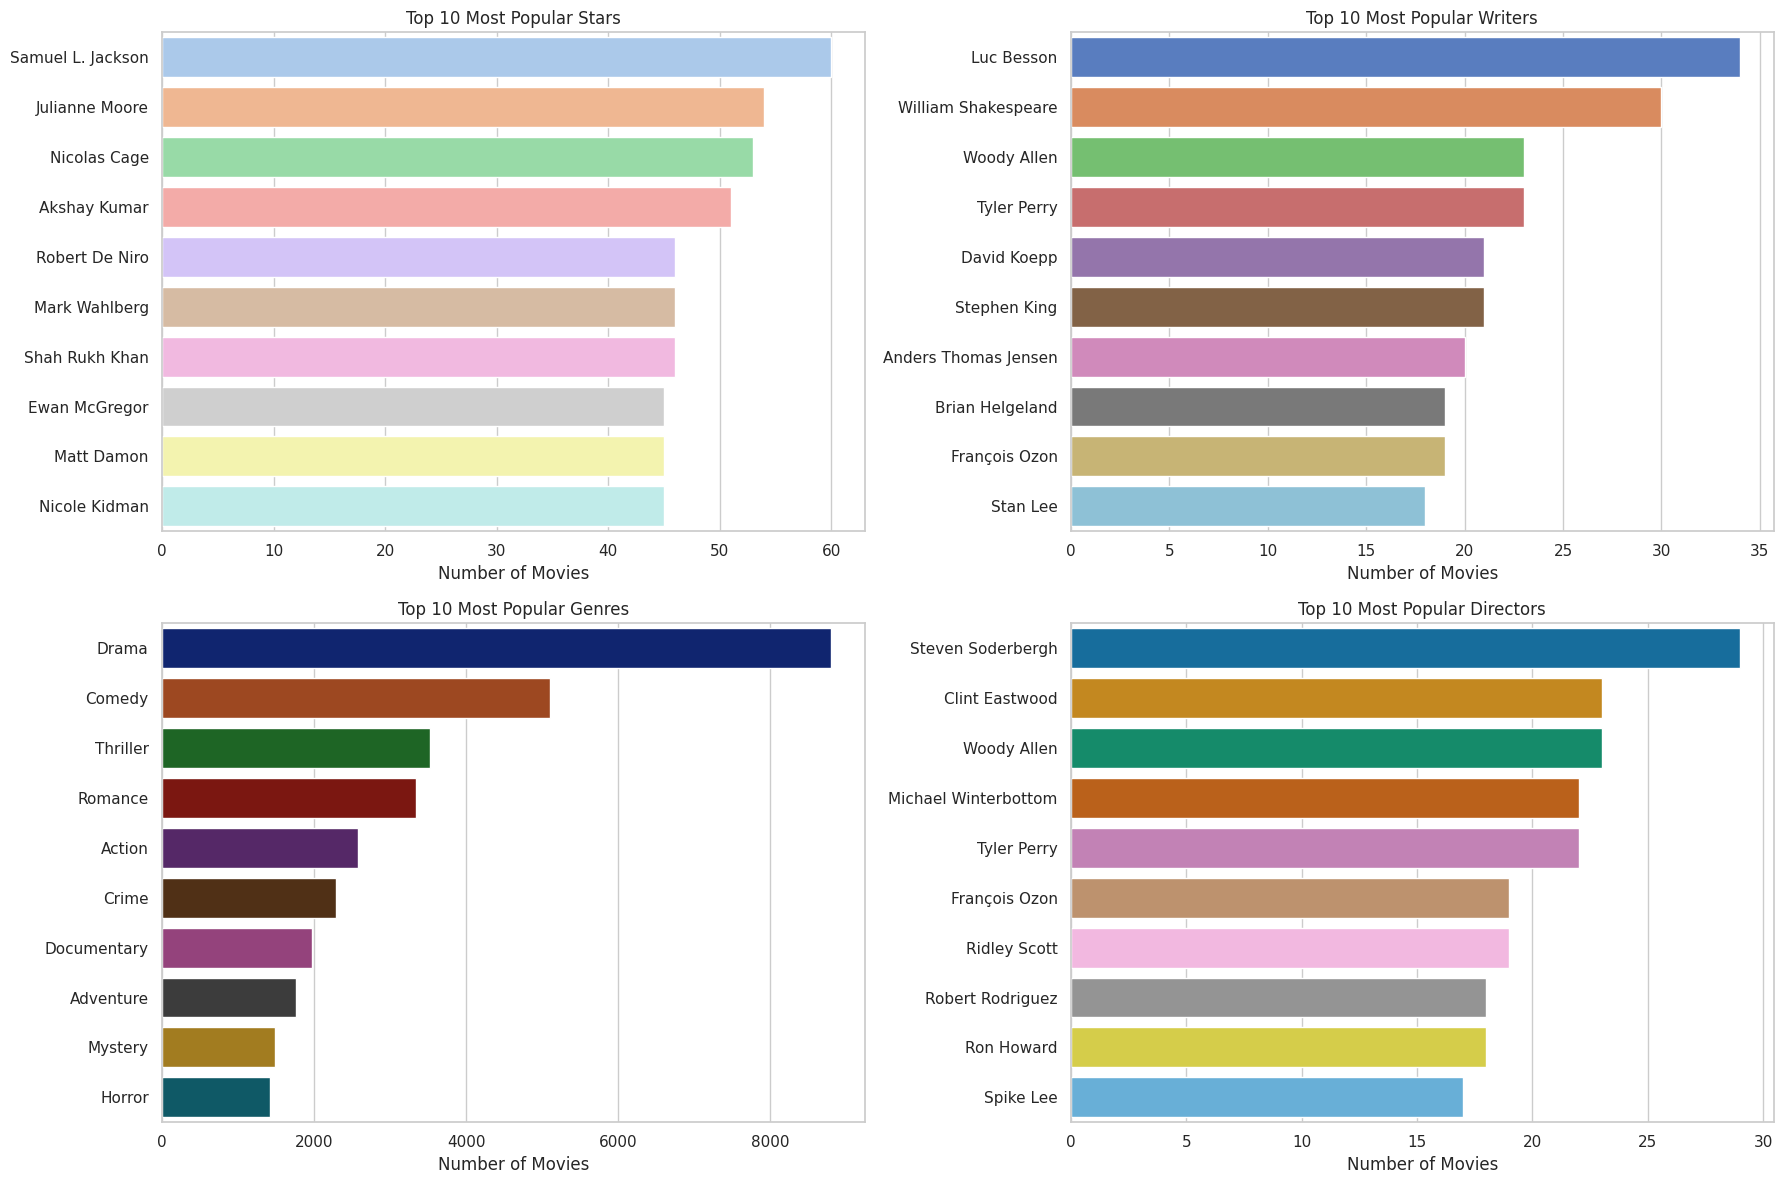

In [240]:
from collections import Counter

def get_top_10(column):
    all_items = [item for sublist in merged_df[column] for item in sublist]
    item_counts = Counter(all_items)
    return item_counts.most_common(10)

top_10_stars = pd.DataFrame(get_top_10('STARS'), columns=['Name', 'Movie Count'])
top_10_writers = pd.DataFrame(get_top_10('WRITERS'), columns=['Name', 'Movie Count'])
top_10_genres = pd.DataFrame(get_top_10('GENRES'), columns=['Name', 'Movie Count'])
top_10_directors = pd.DataFrame(get_top_10('DIRECTORS'), columns=['Name', 'Movie Count'])

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

def plot_top_10(data, title, ax, color):
    sns.barplot(x=data['Movie Count'], y=data['Name'], ax=ax, hue=data['Name'], palette=color, legend=False)
    ax.set_title(title)
    ax.set_xlabel("Number of Movies")
    ax.set_ylabel("")

plot_top_10(top_10_stars, "Top 10 Most Popular Stars", axes[0, 0], "pastel")
plot_top_10(top_10_writers, "Top 10 Most Popular Writers", axes[0, 1], "muted")
plot_top_10(top_10_genres, "Top 10 Most Popular Genres", axes[1, 0], "dark")
plot_top_10(top_10_directors, "Top 10 Most Popular Directors", axes[1, 1], "colorblind")

plt.tight_layout()
plt.show()


In [241]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

genre_mpa_counts = []

for _, row in merged_df.iterrows():
    genres = row['GENRES']
    mpa = row['MPA']
    if mpa in ['R', 'PG', 'PG-13']:
        for genre in genres:
            genre_mpa_counts.append((genre, mpa))

genre_mpa_df = pd.DataFrame(genre_mpa_counts, columns=['Genre', 'MPA'])

top_5_genres = get_top_5_genres(merged_df)
genre_mpa_df = genre_mpa_df[genre_mpa_df['Genre'].isin(top_5_genres)]

mpa_per_genre_counts = genre_mpa_df.groupby(['Genre', 'MPA']).size().reset_index(name='Count')

language_counts = Counter([language for languages in merged_df['LANGUAGES'] for language in languages])
top_languages_df = pd.DataFrame(language_counts.most_common(10), columns=['Language', 'Movie Count'])

fig = make_subplots(rows=1, cols=2, subplot_titles=["MPA Ratings Across Top 5 Genres", "Most Popular Languages for Movies"])

for mpa_rating in ['R', 'PG', 'PG-13']:
    filtered_df = mpa_per_genre_counts[mpa_per_genre_counts["MPA"] == mpa_rating]
    fig.add_trace(
        go.Bar(
            x=filtered_df["Genre"],
            y=filtered_df["Count"],
            name=f"MPA: {mpa_rating}",
        ),
        row=1, col=1
    )

fig.add_trace(
    go.Bar(
        x=top_languages_df["Movie Count"],
        y=top_languages_df["Language"],
        orientation="h",
        marker=dict(color="lightcoral"),
        showlegend=False
    ),
    row=1, col=2
)

fig.update_layout(
    height=600,
    width=1200
)
fig.show()


In [242]:
merged_df.to_csv("Cleaned_Movies_Data_1995_2024.csv", index=False)